In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import importlib
from plotfunctions import *
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes 
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from sklearn.metrics import auc

from data_loader import *
from frechetdist import frdist
import json

## MNIST

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[0 2 4 6 8]


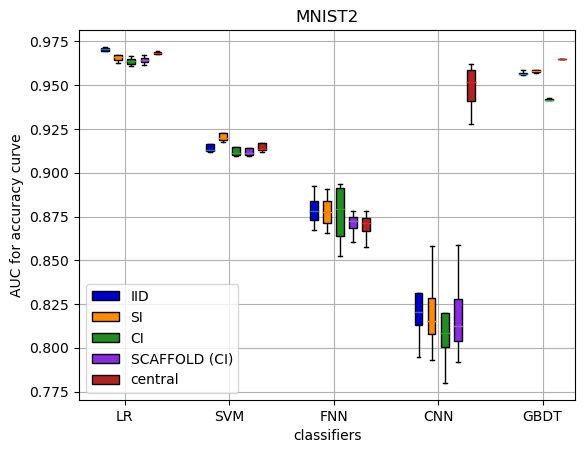

In [18]:
LR_2c_dict = load_2c_LR()
SVM_2c_dict = load_2c_SVM()
FNN_2c_dict = load_2c_FNN()
CNN_2c_dict = load_2c_CNN()
DT_2c_dict = load_2c_DT()

fed_iid = [LR_2c_dict["iid 5e2"].T, SVM_2c_dict["iid"].T, FNN_2c_dict["iid"], CNN_2c_dict["iid"], DT_2c_dict["iid"].T]
fed_ci = [LR_2c_dict["ci"].T, SVM_2c_dict["ci"].T, FNN_2c_dict["ci"], CNN_2c_dict["ci"], DT_2c_dict["ci"].T]
fed_si = [LR_2c_dict["si"].T, SVM_2c_dict["si"].T, FNN_2c_dict["si"], CNN_2c_dict["si"], DT_2c_dict["si"].T]
fed_scaf = [LR_2c_dict["scaf"].T, SVM_2c_dict["scaf"].T, FNN_2c_dict["scaf"], CNN_2c_dict['scaf']]
cent_list = [LR_2c_dict["central 5e2"].T, SVM_2c_dict["cent 5e5"].T, FNN_2c_dict["cent 5e1"], CNN_2c_dict["cent 5e2"], DT_2c_dict["cent"].T]

legend_labels = ["LR", "SVM", "FNN", "CNN", "GBDT"]


for f_j, (fed, cent) in enumerate(zip(fed_iid, cent_list)):
    aucs_iid = np.zeros(4)
    aucs_ci = np.zeros(4)
    aucs_si = np.zeros(4)
    aucs_scaf = np.zeros(4)
    aucs_cent = np.zeros(4)
    
    for i in range(4):
        #print(legend_labels[f_j], fed.shape, fed_ci[f_j].shape, fed_si[f_j].shape)
        aucs_iid[i] = auc(np.linspace(0,1,100),fed[i,:])
        aucs_ci[i] = auc(np.linspace(0,1,100), fed_ci[f_j][i,:])
        aucs_si[i] = auc(np.linspace(0,1,100),fed_si[f_j][i,:])
        if f_j < 4:
            aucs_scaf[i] = auc(np.linspace(0,1,100), fed_scaf[f_j][i,:])
        aucs_cent[i] = auc(np.linspace(0,1,100), cent[i,:])
    line = np.arange(f_j * 4, f_j*4 + 4)
    bp_iid = plt.boxplot(aucs_iid, positions = [f_j*2 ], showfliers = False, patch_artist=True, medianprops=dict(color='tab:blue'), boxprops=dict(facecolor="mediumblue"))
    bp_si = plt.boxplot(aucs_si, positions = [f_j*2 + 0.25], showfliers = False, patch_artist=True, medianprops=dict(color='tab:orange'), boxprops=dict(facecolor="darkorange"))
    bp_ci = plt.boxplot(aucs_ci, positions = [f_j*2 + 0.5], showfliers = False, patch_artist=True, medianprops=dict(color='tab:green'), boxprops=dict(facecolor="forestgreen"))
    if f_j < 4:
        bp_scaf = plt.boxplot(aucs_scaf, positions = [f_j * 2 + 0.75],showfliers = False, manage_ticks = False, patch_artist=True, medianprops=dict(color='tab:purple'), boxprops=dict(facecolor="blueviolet"))
        bp_cent = plt.boxplot(aucs_cent, positions = [f_j*2 + 1], showfliers = False, manage_ticks = False, patch_artist=True, medianprops=dict(color='tab:red'), boxprops=dict(facecolor="firebrick"))
    else:
        bp_cent = plt.boxplot(aucs_cent, positions = [f_j*2 + 0.75], showfliers = False, manage_ticks = False, patch_artist=True, medianprops=dict(color='tab:red'), boxprops=dict(facecolor="firebrick"))
    
print(np.arange(0, len(legend_labels) * 2,2))
plt.xticks([0.375, 2.375, 4.375, 6.375, 8.375], legend_labels)
plt.legend([bp_iid["boxes"][0], bp_si["boxes"][0], bp_ci["boxes"][0], bp_scaf["boxes"][0], bp_cent["boxes"][0]], ["IID","SI","CI","SCAFFOLD (CI)", "central"])
plt.grid(True)
plt.title("MNIST2")
plt.xlabel("classifiers")
plt.ylabel("AUC for accuracy curve")
plt.savefig("AUC_MNIST2.eps", format="eps")

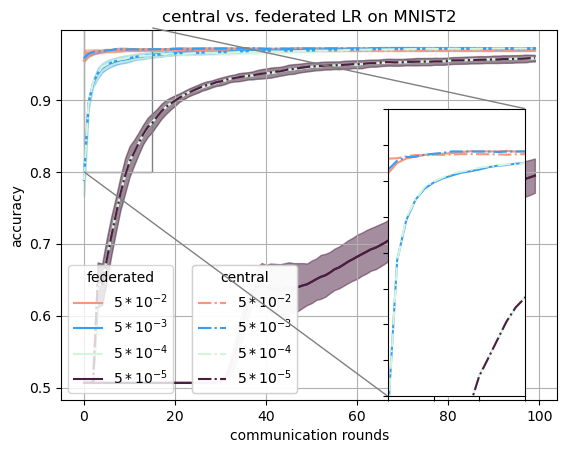

In [8]:
LR_2c_dict = load_2c_LR()


colors = ["#F7967D", "#339EF2", "#D4F4DD", "#4B1D3F", "#010400"]
plot_keys_fed = ["iid 5e2", "iid 5e3", "iid 5e4", "iid 5e5"]
plot_keys_cent = ["central 5e2", "central 5e3", "central 5e4", "central 5e5"]
#colors = ['b', 'y', 'g', 'r', 'k']
legend_labels = ["$5*10^{-2}$", "$5*10^{-3}$", "$5*10^{-4}$", "$5*10^{-5}$"]


#X and Y range for zoomed in region
Xl = 0
Xh = 15
Yl = 0.8
Yh = 1

lines_fed = []
lines_cent = []

fig = plt.figure()
ax = plt.axes()
#axins = zoomed_inset_axes(ax, 2, loc=10)


#ax.plot(LR_2c_dict["iid 5e2"])
#axins.plot(LR_2c_dict["iid 5e2"])


for key_fed, key_cent, color in zip(plot_keys_fed, plot_keys_cent, colors):
    line_fed = plot_range(LR_2c_dict[key_fed].T, color = color, alpha = 1)
    line_cent = plot_range(LR_2c_dict[key_cent].T, line = "-.", color = color, alpha = 1)
    
    ax.add_artist(line_fed)
    ax.add_artist(line_cent)
    
    lines_fed.append(line_fed)
    lines_cent.append(line_cent)

    
legend1 = plt.legend(lines_fed, legend_labels, loc=3, title= "federated")    
legend2 = plt.legend(lines_cent, legend_labels, loc=3, title= "central", bbox_to_anchor=(0.25,0))
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)

axins = zoomed_inset_axes(ax, 2, loc=10, bbox_to_anchor=(475,200))

for key_fed, key_cent, color in zip(plot_keys_fed, plot_keys_cent, colors):
    mean_fed = np.mean(LR_2c_dict[key_fed],axis=1)
    mean_cent = np.mean(LR_2c_dict[key_cent], axis=1)
    
    axins.plot(mean_fed, color=color)
    axins.plot(mean_cent,"-.", color=color)
    
plt.setp(axins.get_xticklabels(), visible=False)
plt.setp(axins.get_yticklabels(), visible=False)
  
#axins.plot(LR_2c_dict["ci"][:,1],color= 'y')
#axins.plot(LR_4c_dict["ci"][:,1],"-.", color= 'y')
axins.set_xlim(Xl, Xh)
axins.set_ylim(Yl, Yh)
mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.5")
ax.grid(True)
ax.set_title("central vs. federated LR on MNIST2")
ax.set_xlabel("communication rounds")
ax.set_ylabel("accuracy")
plt.savefig("MNIST2_lrate.png", format="png")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


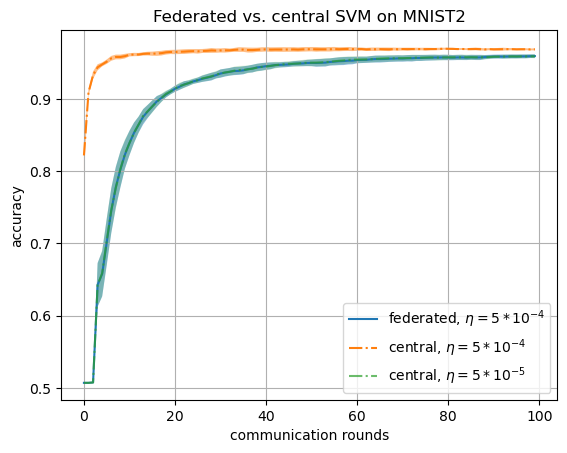

In [19]:
plot_range(SVM_2c_dict["iid"].T, label = "federated, $\eta = 5 * 10^{-4}$", alpha = 1)
plot_range(SVM_2c_dict["cent 5e4"].T, line = "-.", alpha = 1, label = "central, $\eta = 5*10^{-4}$")
plot_range(SVM_2c_dict["cent 5e5"].T, line = "-.", alpha = 0.7, label = "central, $\eta = 5*10^{-5}$")
plt.legend()
plt.grid(True)
plt.title("Federated vs. central SVM on MNIST2")
plt.xlabel("communication rounds")
plt.ylabel("accuracy")
plt.savefig("SVM_lrates.eps", format="eps")

## MNIST4

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[0 2 4 6 8]


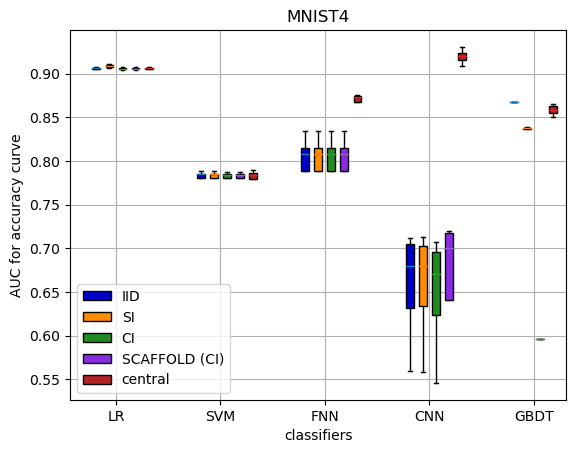

In [17]:
LR_4c_dict = load_4c_LR()
SVM_4c_dict = load_4c_SVM()
FNN_4c_dict = load_4c_FNN()
CNN_4c_dict = load_4c_CNN()
DT_4c_dict = load_4c_DT()

fed_iid = [LR_4c_dict["iid"].T, SVM_4c_dict["iid"].T, FNN_4c_dict["iid"], CNN_4c_dict["iid"], DT_4c_dict["iid"].T]
fed_ci = [LR_4c_dict["ci"].T, SVM_4c_dict["ci"].T, FNN_4c_dict["ci"], CNN_4c_dict["ci"], DT_4c_dict["ci"].T]
fed_si = [LR_4c_dict["si"].T, SVM_4c_dict["si"].T, FNN_4c_dict["si"], CNN_4c_dict["si"], DT_4c_dict["si"].T]
fed_scaf = [LR_4c_dict["scaf"].T, SVM_4c_dict["scaf"].T, FNN_4c_dict["scaf"], CNN_4c_dict["scaf"]]

cent_list = [LR_4c_dict["central 5e5"].T, SVM_4c_dict["cent 5e6"].T, FNN_4c_dict["cent 5e1"], CNN_4c_dict["cent 5e2"], DT_4c_dict["cent"].T]

legend_labels = ["LR", "SVM", "FNN", "CNN", "GBDT"]


for f_j, (fed, cent) in enumerate(zip(fed_iid, cent_list)):
    aucs_iid = np.zeros(4)
    aucs_ci = np.zeros(4)
    aucs_si = np.zeros(4)
    aucs_scaf = np.zeros(4)
    aucs_cent = np.zeros(4)
    for i in range(4):
        #print(legend_labels[f_j], cent.shape)
        
        #print(legend_labels[f_j], fed.shape, fed_ci[f_j].shape, fed_si[f_j].shape)
        leng = min(fed.shape[1], fed_ci[f_j].shape[1], fed_si[f_j].shape[1], cent.shape[1])
        aucs_iid[i] = auc(np.linspace(0,1,leng),fed[i,:leng])
        aucs_ci[i] = auc(np.linspace(0,1,leng), fed_ci[f_j][i,:leng])
        aucs_si[i] = auc(np.linspace(0,1,leng),fed_si[f_j][i,:leng])
        if f_j < 4:
            aucs_scaf[i] = auc(np.linspace(0,1,leng), fed_scaf[f_j][i,:leng])
        aucs_cent[i] = auc(np.linspace(0,1,leng), cent[i,:leng])
    line = np.arange(f_j * 4, f_j*4 + 4)
    bp_iid = plt.boxplot(aucs_iid, positions = [f_j*2 ], showfliers = False, patch_artist=True, medianprops=dict(color='tab:blue'), boxprops=dict(facecolor="mediumblue"))
    bp_si = plt.boxplot(aucs_si, positions = [f_j*2 + 0.25], showfliers = False, patch_artist=True, medianprops=dict(color='tab:orange'), boxprops=dict(facecolor="darkorange"))
    bp_ci = plt.boxplot(aucs_ci, positions = [f_j*2 + 0.5], showfliers = False, patch_artist=True, medianprops=dict(color='tab:green'), boxprops=dict(facecolor="forestgreen"))
    
    if f_j < 4:
        bp_scaf = plt.boxplot(aucs_scaf, positions = [f_j * 2 + 0.75], showfliers = False, patch_artist=True, medianprops=dict(color='tab:purple'), boxprops=dict(facecolor="blueviolet"))
        bp_cent = plt.boxplot(aucs_cent, positions = [f_j*2 + 1], showfliers = False, manage_ticks = False, patch_artist=True, medianprops=dict(color='tab:red'), boxprops=dict(facecolor="firebrick"))
    else:
        bp_cent = plt.boxplot(aucs_cent, positions = [f_j*2 + 0.75], showfliers = False, manage_ticks = False, patch_artist=True, medianprops=dict(color='tab:red'), boxprops=dict(facecolor="firebrick"))
    
print(np.arange(0, len(legend_labels) * 2,2))
plt.xticks([0.375, 2.375, 4.375, 6.375, 8.375], legend_labels)
plt.legend([bp_iid["boxes"][0], bp_si["boxes"][0], bp_ci["boxes"][0], bp_scaf["boxes"][0], bp_cent["boxes"][0]], ["IID","SI","CI", "SCAFFOLD (CI)", "central"])
plt.grid(True)
plt.title("MNIST4")
plt.xlabel("classifiers")
plt.ylabel("AUC for accuracy curve")
plt.savefig("AUC_MNIST4.eps", format="eps")

## Fashion MNIST



LR (4, 200) (4, 100)
LR (4, 200) (4, 100)
LR (4, 200) (4, 100)
LR (4, 200) (4, 100)
SVM (4, 300) (4, 100)
SVM (4, 300) (4, 100)
SVM (4, 300) (4, 100)
SVM (4, 300) (4, 100)
FNN (4, 100) (4, 100)
FNN (4, 100) (4, 100)
FNN (4, 100) (4, 100)
FNN (4, 100) (4, 100)
CNN (4, 500) (4, 100)
CNN (4, 500) (4, 100)
CNN (4, 500) (4, 100)
CNN (4, 500) (4, 100)
GBDT (4, 100) (4, 100)
GBDT (4, 100) (4, 100)
GBDT (4, 100) (4, 100)
GBDT (4, 100) (4, 100)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


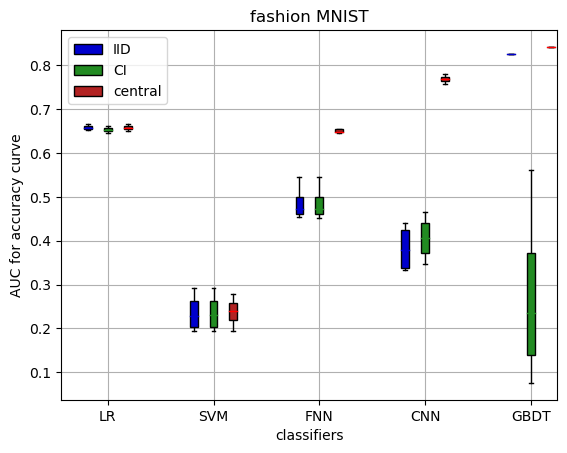

In [2]:
LR_f_dict = load_f_LR()
SVM_f_dict = load_f_SVM()
FNN_f_dict = load_f_FNN()
CNN_f_dict = load_f_CNN()
DT_f_dict = load_f_DT()

fed_iid = [LR_f_dict["iid"].T, SVM_f_dict["iid"].T, FNN_f_dict["iid"], CNN_f_dict["iid"].T, DT_f_dict["iid"].T]
fed_ci = [LR_f_dict["ci"].T, SVM_f_dict["ci"].T, FNN_f_dict["ci"], CNN_f_dict["ci"].T, DT_f_dict["ci"].T]
cent_list = [LR_f_dict["central 5e6"].T, SVM_f_dict["central 5e6"].T, FNN_f_dict["central"], CNN_f_dict["cent 5e2"].T, DT_f_dict["cent"].T]

legend_labels = ["LR", "SVM", "FNN", "CNN", "GBDT"]


for f_j, (fed, cent) in enumerate(zip(fed_iid, cent_list)):
    aucs_iid = np.zeros(4)
    aucs_ci = np.zeros(4)
    aucs_si = np.zeros(4)
    aucs_cent = np.zeros(4)
    for i in range(4):
        #print(legend_labels[f_j], cent.shape)
        
        print(legend_labels[f_j], fed.shape, fed_ci[f_j].shape)
        leng = min(fed.shape[1], fed_ci[f_j].shape[1], cent.shape[1])
        aucs_iid[i] = auc(np.linspace(0,1,leng),fed[i,:leng])
        aucs_ci[i] = auc(np.linspace(0,1,leng), fed_ci[f_j][i,:leng])
        aucs_cent[i] = auc(np.linspace(0,1,leng), cent[i,:leng])
    line = np.arange(f_j * 4, f_j*4 + 4)
    bp_iid = plt.boxplot(aucs_iid, positions = [f_j*2 ], showfliers = False, patch_artist=True, medianprops=dict(color='mediumblue'), boxprops=dict(facecolor="mediumblue"))
    bp_ci = plt.boxplot(aucs_ci, positions = [f_j*2 + 0.375], showfliers = False, patch_artist=True, medianprops=dict(color='forestgreen'), boxprops=dict(facecolor="forestgreen"))
    bp_cent = plt.boxplot(aucs_cent, positions = [f_j*2 + 0.75], showfliers = False, manage_ticks = False, patch_artist=True, medianprops=dict(color='r'), boxprops=dict(facecolor="firebrick"))
    
#print(np.arange(0, len(legend_labels) * 2,2))
plt.xticks([0.375, 2.375, 4.375, 6.375, 8.375], legend_labels)
plt.legend([bp_iid["boxes"][0], bp_ci["boxes"][0], bp_cent["boxes"][0]], ["IID","CI", "central"])
plt.grid(True)
plt.title("fashion MNIST")
plt.xlabel("classifiers")
plt.ylabel("AUC for accuracy curve")
plt.savefig("AUC_fashionMNIST.eps", format="eps")

## A2

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


LR (4, 100) (4, 100)
LR (4, 100) (4, 100)
LR (4, 100) (4, 100)
LR (4, 100) (4, 100)
SVM (4, 100) (4, 100)
SVM (4, 100) (4, 100)
SVM (4, 100) (4, 100)
SVM (4, 100) (4, 100)
FNN (4, 100) (4, 100)
FNN (4, 100) (4, 100)
FNN (4, 100) (4, 100)
FNN (4, 100) (4, 100)
CNN (4, 100) (4, 100)
CNN (4, 100) (4, 100)
CNN (4, 100) (4, 100)
CNN (4, 100) (4, 100)
GBDT (4, 100) (4, 100)
GBDT (4, 100) (4, 100)
GBDT (4, 100) (4, 100)
GBDT (4, 100) (4, 100)
[0 2 4 6 8]


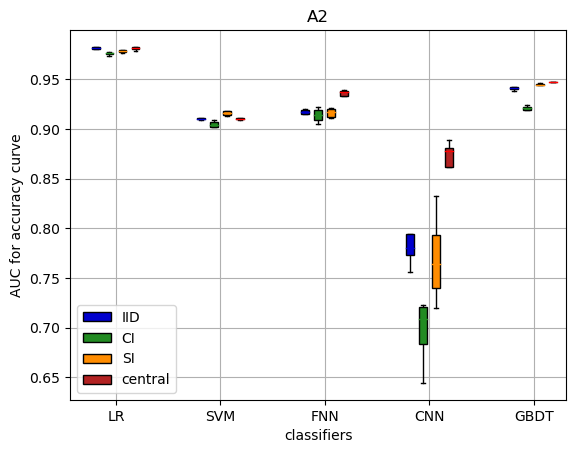

In [24]:
LR_A2_dict = load_A2_LR()
SVM_A2_dict = load_A2_SVM()
FNN_A2_dict = load_A2_FNN()
CNN_A2_dict = load_A2_CNN()
DT_A2_dict = load_A2_DT()

fed_iid = [LR_A2_dict["IID"], SVM_A2_dict["iid"].T, FNN_A2_dict["IID"], CNN_A2_dict["IID"], DT_A2_dict["IID"]]
fed_ci = [LR_A2_dict["CI"], SVM_A2_dict["ci"].T, FNN_A2_dict["CI"], CNN_A2_dict["CI"], DT_A2_dict["CI"]]
fed_si = [LR_A2_dict["SI"], SVM_A2_dict["si"].T, FNN_A2_dict["SI"], CNN_A2_dict["SI"], DT_A2_dict["SI"]]
cent_list = [LR_A2_dict["central 5e4"], SVM_A2_dict["central 5e6"].T, FNN_A2_dict["central"], CNN_A2_dict["central"].T, DT_A2_dict["central"]]

legend_labels = ["LR", "SVM", "FNN", "CNN", "GBDT"]


for f_j, (fed, cent) in enumerate(zip(fed_iid, cent_list)):
    aucs_iid = np.zeros(4)
    aucs_ci = np.zeros(4)
    aucs_si = np.zeros(4)
    aucs_cent = np.zeros(4)
    for i in range(4):
        #print(legend_labels[f_j], cent.shape)
        
        print(legend_labels[f_j], fed.shape, fed_ci[f_j].shape)
        leng = min(fed.shape[1],fed_si[f_j].shape[1], fed_ci[f_j].shape[1], cent.shape[1])
        aucs_iid[i] = auc(np.linspace(0,1,leng),fed[i,:leng])
        aucs_ci[i] = auc(np.linspace(0,1,leng), fed_ci[f_j][i,:leng])
        aucs_si[i] = auc(np.linspace(0,1,leng), fed_si[f_j][i,:leng])
        aucs_cent[i] = auc(np.linspace(0,1,leng), cent[i,:leng])
    line = np.arange(f_j * 4, f_j*4 + 4)
    bp_iid = plt.boxplot(aucs_iid, positions = [f_j*2 ], showfliers = False, patch_artist=True, medianprops=dict(color='mediumblue'), boxprops=dict(facecolor="mediumblue"))
    bp_ci = plt.boxplot(aucs_ci, positions = [f_j*2 + 0.25], showfliers = False, patch_artist=True, medianprops=dict(color='forestgreen'), boxprops=dict(facecolor="forestgreen"))
    bp_si = plt.boxplot(aucs_si, positions = [f_j*2 + 0.5], showfliers = False, patch_artist=True, medianprops=dict(color='darkorange'), boxprops=dict(facecolor="darkorange"))
    bp_cent = plt.boxplot(aucs_cent, positions = [f_j*2 + 0.75], showfliers = False, manage_ticks = False, patch_artist=True, medianprops=dict(color='r'), boxprops=dict(facecolor="firebrick"))
    
print(np.arange(0, len(legend_labels) * 2,2))
plt.xticks([0.375, 2.375, 4.375, 6.375, 8.375], legend_labels)
plt.legend([bp_iid["boxes"][0], bp_ci["boxes"][0],bp_si["boxes"][0], bp_cent["boxes"][0]], ["IID","CI","SI", "central"])
plt.grid(True)
plt.title("A2")
plt.xlabel("classifiers")
plt.ylabel("AUC for accuracy curve")
plt.savefig("AUC_A2.eps", format="eps")

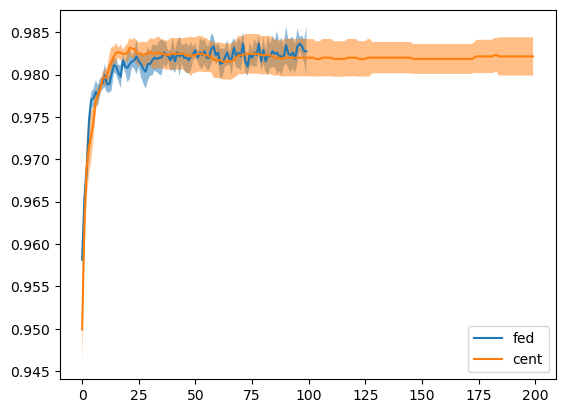

In [7]:
plot_range(LR_A2_dict["IID"], alpha = 1, label = "fed")
plot_range(LR_A2_dict["central 5e4"], alpha = 1, label = "cent")
plt.legend()

## AML

Text(0.5, 1.0, 'Logistic Regression on AML')

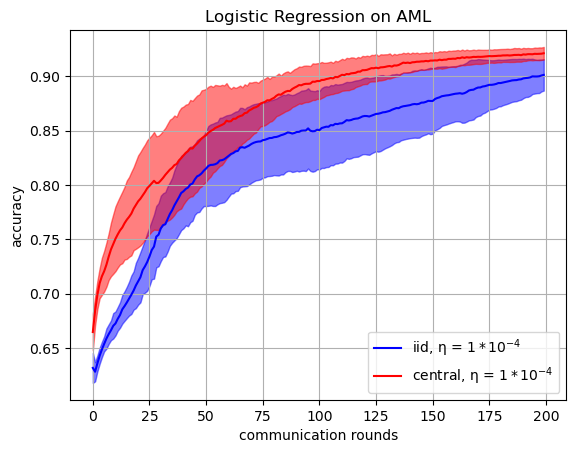

In [2]:
LR_dict = load_3node_LR()

plot_range(LR_dict["iid"], color="b")
plot_range(LR_dict["central"], color="r")
plt.grid(True)
plt.xlabel("communication rounds")
plt.ylabel("accuracy")
plt.legend(["iid, \u03B7 = $1*10^{-4}$","central, \u03B7 = $1*10^{-4}$"], loc=4)
plt.title("Logistic Regression on AML")


Text(0, 0.5, 'accuracy')

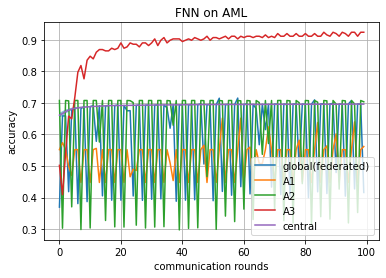

In [20]:
FNN_dict = load_3node_FNN()

plt.plot(np.arange(100), FNN_dict["ci"])
for i in range(3):
    plt.plot(np.arange(100), FNN_dict["ci local"][i,:,:])
plot_range(FNN_dict["central"])
plt.legend(["global(federated)", "A1", "A2", "A3", "central"])
plt.title("FNN on AML")
plt.grid(True)
plt.xlabel("communication rounds")
plt.ylabel("accuracy")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


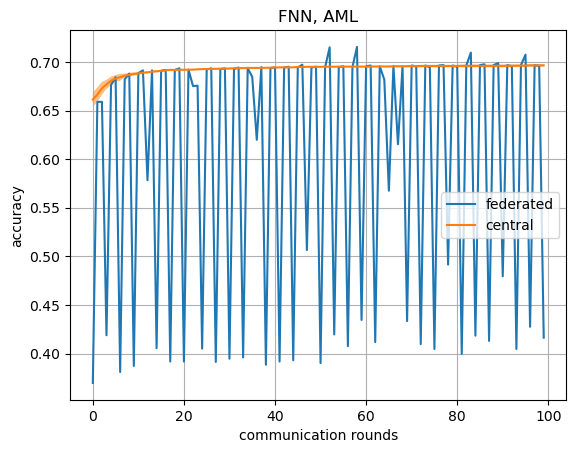

In [6]:
FNN_dict = load_3node_FNN()


plot_range(FNN_dict['ci'].T, alpha = 1)
plot_range(FNN_dict["central"], alpha = 1)
plt.grid(True)
plt.title("FNN, AML")
plt.xlabel("communication rounds")
plt.ylabel("accuracy")
plt.legend(["federated", "central"])
plt.savefig("AML_before.eps", format="eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


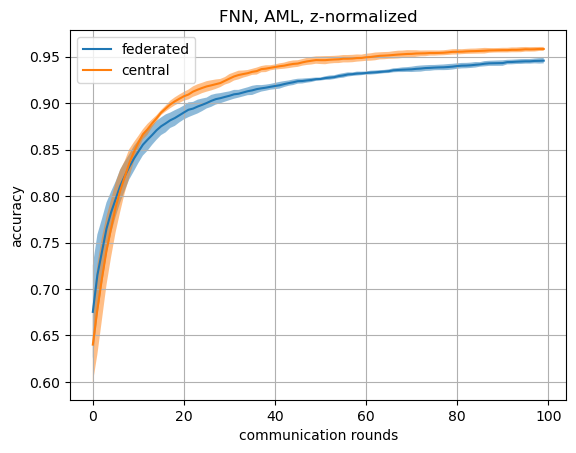

In [7]:
FNN_dict = load_3node_FNN()
#colors = ["#F7967D", "#339EF2", "#D4F4DD", "#4B1D3F", "#010400"]

plot_range(FNN_dict["redemp g"], alpha = 1)
plot_range(FNN_dict["redemp central"], alpha = 1)
#plot_range(FNN_dict["redemp central lr"])
plt.grid(True)
plt.xlabel("communication rounds")
plt.ylabel("accuracy")
plt.title("FNN, AML, z-normalized")
plt.legend(["federated", "central"])
plt.savefig("AML_revisited.eps", format="eps")

## KDR

In [32]:
KDR_LR = load_KDR_lr()
KDR_SVM = load_KDR_SVM()
KDR_CNN = load_KDR_CNN()
KDR_DT = load_KDR_DT()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


LR (4, 100) (4, 100) (4,)
LR (4, 100) (4, 100) (4,)
LR (4, 100) (4, 100) (4,)
LR (4, 100) (4, 100) (4,)
SVM (4, 100) (4, 100) (4,)
SVM (4, 100) (4, 100) (4,)
SVM (4, 100) (4, 100) (4,)
SVM (4, 100) (4, 100) (4,)
FNN (4, 400) (3, 300) (3,)
FNN (4, 400) (3, 300) (3,)
FNN (4, 400) (3, 300) (3,)
CNN (4, 200) (4, 200) (4,)
CNN (4, 200) (4, 200) (4,)
CNN (4, 200) (4, 200) (4,)
CNN (4, 200) (4, 200) (4,)
GBDT (4, 100) (4, 200) (4,)
GBDT (4, 100) (4, 200) (4,)
GBDT (4, 100) (4, 200) (4,)
GBDT (4, 100) (4, 200) (4,)
[0 2 4 6 8]


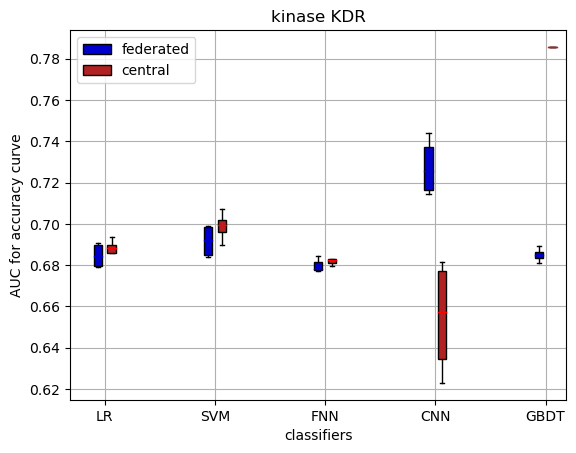

In [9]:
LR_KDR_dict = load_KDR_lr()
SVM_KDR_dict = load_KDR_SVM()
FNN_KDR_dict = load_KDR_FNN()
CNN_KDR_dict = load_KDR_CNN()
DT_KDR_dict = load_KDR_DT()

fed_list = [LR_KDR_dict["acc"].T, SVM_KDR_dict["acc"].T, FNN_KDR_dict["acc"].T, CNN_KDR_dict["acc"].T, DT_KDR_dict["acc"].T]

#dict_list = [LR_KDR_dict, SVM_KDR_dict, FNN_KDR_dict, CNN_KDR_dict, DT_KDR_dict]
cent_list = [LR_KDR_dict["cent acc"], SVM_KDR_dict["cent acc"], FNN_KDR_dict["cent acc"].T, CNN_KDR_dict["cent acc"], DT_KDR_dict["cent acc"]]

legend_labels = ["LR", "SVM", "FNN", "CNN", "GBDT"]


for f_j, (fed, cent) in enumerate(zip(fed_list, cent_list)):
    
    aucs_iid = np.zeros(min(fed.shape[0], cent.shape[0]))
    aucs_cent = np.zeros(min(fed.shape[0], cent.shape[0]))
    for i in range(fed.shape[0]):
        print(legend_labels[f_j], cent.shape, fed.shape, aucs_iid.shape)
        
        #print(legend_labels[f_j], fed.shape, fed_ci[f_j].shape)
        leng = min(fed.shape[1],  cent.shape[1])
        aucs_iid[i] = auc(np.linspace(0,1,leng),fed[i,:leng])
        aucs_cent[i] = auc(np.linspace(0,1,leng), cent[i,:leng])
    line = np.arange(f_j * 4, f_j*4 + 4)
    bp_iid = plt.boxplot(aucs_iid, positions = [f_j*2 + 0.25 ], showfliers = False, patch_artist=True, medianprops=dict(color='mediumblue'), boxprops=dict(facecolor="mediumblue"))
    bp_cent = plt.boxplot(aucs_cent, positions = [f_j*2 + 0.5], showfliers = False, manage_ticks = False, patch_artist=True, medianprops=dict(color='r'), boxprops=dict(facecolor="firebrick"))
    
print(np.arange(0, len(legend_labels) * 2,2))
plt.xticks([0.375, 2.375, 4.375, 6.375, 8.375], legend_labels)
plt.legend([bp_iid["boxes"][0],  bp_cent["boxes"][0]], ["federated", "central"])
plt.grid(True)
plt.title("kinase KDR")
plt.xlabel("classifiers")
plt.ylabel("AUC for accuracy curve")
plt.savefig("AUC_KDR.eps", format="eps")

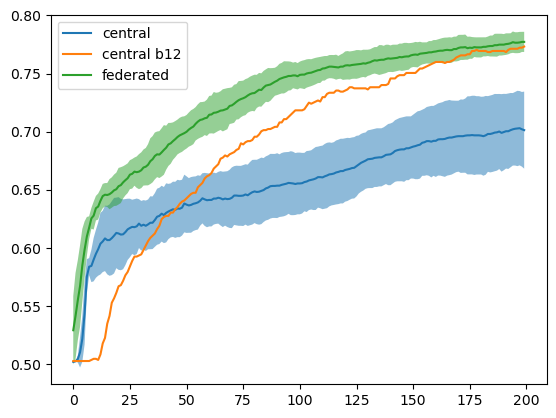

In [5]:
plot_range(CNN_KDR_dict["cent acc"], alpha = 1, label = "central")
plot_range(CNN_KDR_dict["cent acc b12"], alpha = 1, label = "central b12")

plot_range(CNN_KDR_dict['acc'].T, alpha = 1, label = "federated")
plt.legend()

## ABL1

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


LR (4, 100) (4, 100) (4,)
LR (4, 100) (4, 100) (4,)
LR (4, 100) (4, 100) (4,)
LR (4, 100) (4, 100) (4,)
SVM (4, 100) (4, 100) (4,)
SVM (4, 100) (4, 100) (4,)
SVM (4, 100) (4, 100) (4,)
SVM (4, 100) (4, 100) (4,)
FNN (4, 200) (3, 100) (3,)
FNN (4, 200) (3, 100) (3,)
FNN (4, 200) (3, 100) (3,)
CNN (4, 200) (4, 200) (4,)
CNN (4, 200) (4, 200) (4,)
CNN (4, 200) (4, 200) (4,)
CNN (4, 200) (4, 200) (4,)
GBDT (4, 100) (4, 200) (4,)
GBDT (4, 100) (4, 200) (4,)
GBDT (4, 100) (4, 200) (4,)
GBDT (4, 100) (4, 200) (4,)
[0 2 4 6 8]


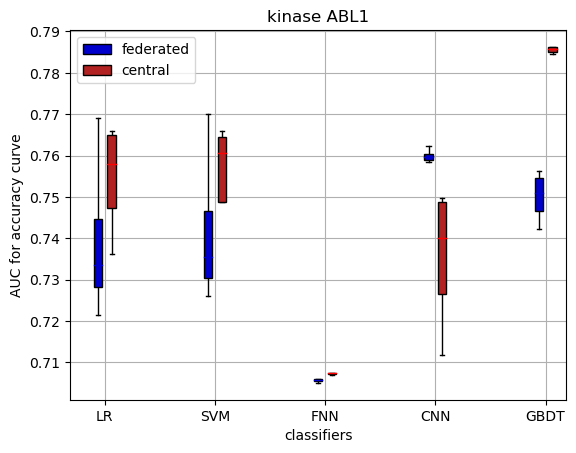

In [9]:
LR_ABL1_dict = load_ABL1_lr()
SVM_ABL1_dict = load_ABL1_SVM()
FNN_ABL1_dict = load_ABL1_FNN()
CNN_ABL1_dict = load_ABL1_CNN()
DT_ABL1_dict = load_ABL1_DT()

fed_list = [LR_ABL1_dict["acc"].T, SVM_ABL1_dict["acc"].T, FNN_ABL1_dict["acc"].T, CNN_ABL1_dict["acc"].T, DT_ABL1_dict["acc"].T]

#dict_list = [LR_ABL1_dict, SVM_ABL1_dict, FNN_ABL1_dict, CNN_ABL1_dict, DT_ABL1_dict]
cent_list = [LR_ABL1_dict["cent acc"], SVM_ABL1_dict["cent acc"], FNN_ABL1_dict["cent acc"], CNN_ABL1_dict["cent acc"], DT_ABL1_dict["cent acc"]]

legend_labels = ["LR", "SVM", "FNN", "CNN", "GBDT"]


for f_j, (fed, cent) in enumerate(zip(fed_list, cent_list)):
    
    aucs_iid = np.zeros(min(fed.shape[0], cent.shape[0]))
    aucs_cent = np.zeros(min(fed.shape[0], cent.shape[0]))
    for i in range(fed.shape[0]):
        print(legend_labels[f_j], cent.shape, fed.shape, aucs_iid.shape)
        
        #print(legend_labels[f_j], fed.shape, fed_ci[f_j].shape)
        leng = min(fed.shape[1],  cent.shape[1])
        aucs_iid[i] = auc(np.linspace(0,1,leng),fed[i,:leng])
        aucs_cent[i] = auc(np.linspace(0,1,leng), cent[i,:leng])
    line = np.arange(f_j * 4, f_j*4 + 4)
    bp_iid = plt.boxplot(aucs_iid, positions = [f_j*2 + 0.25 ], showfliers = False, patch_artist=True, medianprops=dict(color='mediumblue'), boxprops=dict(facecolor="mediumblue"))
    bp_cent = plt.boxplot(aucs_cent, positions = [f_j*2 + 0.5], showfliers = False, manage_ticks = False, patch_artist=True, medianprops=dict(color='r'), boxprops=dict(facecolor="firebrick"))
    
print(np.arange(0, len(legend_labels) * 2,2))
plt.xticks([0.375, 2.375, 4.375, 6.375, 8.375], legend_labels)
plt.legend([bp_iid["boxes"][0],  bp_cent["boxes"][0]], ["federated", "central"])
plt.grid(True)
plt.title("kinase ABL1")
plt.xlabel("classifiers")
plt.ylabel("AUC for accuracy curve")
plt.savefig("AUC_ABL1.eps", format="eps")

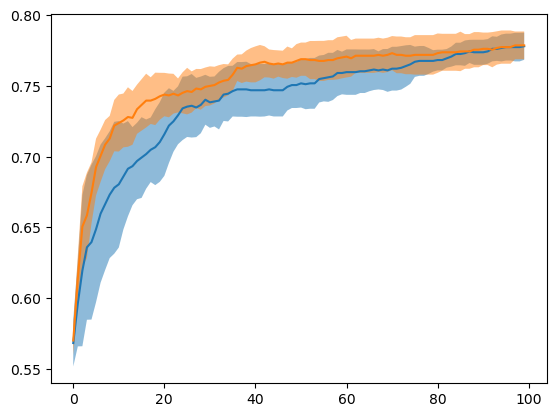

In [12]:
plot_range(LR_ABL1_dict["acc"].T, alpha = 1)
plot_range(LR_ABL1_dict['cent acc'], alpha =1)


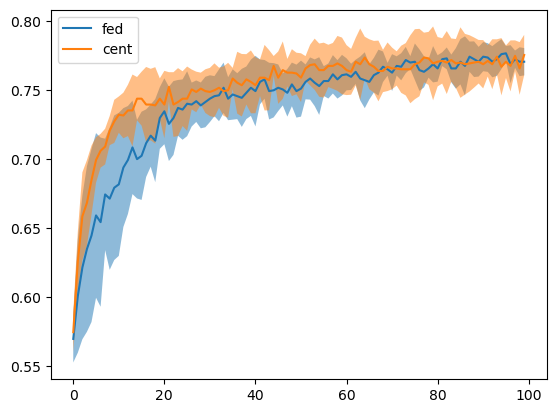

In [10]:
plot_range(SVM_ABL1_dict["acc"].T, alpha = 1, label = "fed")
plot_range(SVM_ABL1_dict["cent acc"], alpha = 1, label = "cent")
plt.legend()

## Other stuff (old vizualisations)

In [ ]:
sizes_KDR = [3750, 366, 1169]
fed_files = ["Fed/KDR/slurm-8080208", "Fed/KDR/slurm-8080209", "Fed/KDR/slurm-8080210", "Fed/KDR/slurm-8080211"]
cent_files = ["cent/KDR/slurm-8080076", "cent/KDR/slurm-8080077", "cent/KDR/slurm-8080078", "cent/KDR/slurm-8080079"]
#/home/swier/Documents/FedvsCent/HPC_results/proc_files/Fed/KDR
fed_KDR_FNN = plot_files(fed_files, 'accuracy', sizes_KDR, show_bs = False)
cent_KDR_FNN = plot_files(cent_files, 'accuracy', sizes_KDR, fed=False, show_bs = False)
plt.legend()
plt.title("FNN, KDR")
plt.savefig("FNN_KDR.svg", format="svg")

In [ ]:
plot_range(KDR_LR["acc"].T, alpha = 1, label = "federated")
plot_range(KDR_LR["cent acc"], alpha = 1, label = "central")
plt.grid(True)
plt.title("KDR, LR")
plt.legend()

In [ ]:
DT_dict = load_f_DT()

plot_range(DT_dict["iid"].T, color="blue")
plot_range(DT_dict["ci"].T, color="y")
plot_range(DT_dict["cent"].T, color="r")
plt.grid(True)
plt.xlabel("communication rounds")
plt.ylabel("accuracy")
plt.legend(["iid", "ci", "central"])
plt.title("GBDT on fashion MNIST")

In [ ]:
SVM_dict = load_A2_SVM()

plot_range(SVM_dict["iid"].T, color="b")
plot_range(SVM_dict["ci"].T, color="y")
plot_range(SVM_dict["si"].T, color="g")
plot_range(SVM_dict["central"].T[:,0:100], color="r")
plot_range(SVM_dict["central 5e6"].T[:,0:100], color="k")
plt.grid(True)
plt.xlabel("communication rounds")
plt.ylabel("accuracy")
plt.legend(["iid, \u03B7 = $5*10^{-5}$","ci, \u03B7 = $5*10^{-5}$","si, \u03B7 = $5*10^{-5}$" ,"central, \u03B7 = $5*10^{-5}$", "central, \u03B7 = $5*10^{-6}$"], loc=4)


In [ ]:
FNN_dict = load_2node_FNN()

plot_range(FNN_dict["iid"].T)
plot_range(FNN_dict["central"])
plt.grid(True)
plt.xlabel("communication rounds")
plt.ylabel("accuracy")
plt.title("FNN on AML, A3 omitted (\u03B7 = $5*10^{-3}$)")
plt.legend(["federated", "central"])

In [ ]:
KDR_LR = load_KDR_lr()
KDR_SVM = load_KDR_SVM()
KDR_CNN = load_KDR_CNN()
KDR_DT = load_KDR_DT()

fed_list = [KDR_LR["acc"].T, KDR_SVM['acc'].T, fed_KDR_FNN, KDR_CNN["acc"].T, KDR_DT["acc"].T]
cent_list = [KDR_LR["cent acc"], KDR_SVM["cent acc"], cent_KDR_FNN, KDR_CNN["cent acc"], KDR_DT["cent acc"]]

legend_labels = ["LR", "SVM", "FNN", "CNN", "GBDT"]
start_epoch = 20

for f_j, (fed, cent) in enumerate(zip(fed_list, cent_list)):
    frd_iid = np.zeros(4)
    frd_ci = np.zeros_like(frd_iid)
    frd_si = np.zeros_like(frd_iid)

    print(fed.shape, cent.shape)
    for i in range(4):

        curve_iid = np.stack([fed[i,start_epoch:min(fed.shape[1], cent.shape[1])], np.arange(fed.shape[1])[start_epoch:min(fed.shape[1], cent.shape[1])]/ min(fed.shape[1], cent.shape[1])], axis = 1)
        curve_cent = np.stack([cent[i,start_epoch:min(fed.shape[1], cent.shape[1])], np.arange(cent.shape[1])[start_epoch:min(fed.shape[1], cent.shape[1])]/ min(fed.shape[1], cent.shape[1])], axis = 1)

        frd_iid[i] = frdist(curve_iid, curve_cent)
    line = np.arange(f_j * 4, f_j*4 + 4)
    bp_iid = plt.boxplot(frd_iid, positions = [f_j], showfliers = False, patch_artist=True, medianprops=dict(color='b'), boxprops=dict(facecolor="darkgreen"))

plt.grid(True)
plt.title("kinase KDR, after " + str(start_epoch) +  " epochs")
plt.xlabel("classifiers")
plt.ylabel("Frechet distance of accuracy curve after" + str(start_epoch) + " epochs")
plt.xticks([0, 1, 2, 3, 4], ["LR", "SVM", "FNN", "CNN", "GBDT"])
plt.savefig("KDR_frechet.svg", format="svg")

In [ ]:
CNN_dict = load_f_CNN()
colors = ["#F7967D", "#339EF2", "#D4F4DD", "#4B1D3F", "#010400"]

plot_range(CNN_dict["iid"].T, color=colors[0])
plot_range(CNN_dict["cent 5e2"].T, color=colors[1])
plot_range(CNN_dict["cent 5e3"].T, color=colors[3])
plt.legend(["federated, \u03B7 = 0.05","central, \u03B7 = 0.05", "central, \u03B7 = 0.005"],loc=4)
plt.grid(True)
plt.xlabel("communication rounds")
plt.ylabel("accuracy")
plt.title("CNN on fashion MNIST")
plt.savefig("poster_fashion.svg", format="svg")

In [ ]:
LR_dict = load_f_LR()

plot_range(LR_dict["iid"].T[:,0:100], color="b")
plot_range(LR_dict["ci"].T[:,0:100], color="y")
plot_range(LR_dict["central 5e5"].T[:,0:100], color="r")
plot_range(LR_dict["central 5e6"].T, color="k")
plt.grid(True)
plt.xlabel("communication rounds")
plt.ylabel("accuracy")
plt.title("Logistic Regression on fashion MNIST")
plt.legend(["iid, \u03B7 = $5*10^{-5}$","ci, \u03B7 = $5*10^{-5}$", "central, \u03B7 = $5*10^{-5}$", "central, \u03B7 = $5*10^{-6}$"], loc=4)


In [ ]:
LR_2c_dict = load_2c_LR()
SVM_2c_dict = load_2c_SVM()
FNN_2c_dict = load_2c_FNN()
CNN_2c_dict = load_2c_CNN()
DT_2c_dict = load_2c_DT()

fed_list = [LR_2c_dict["iid 5e2"].T, SVM_2c_dict["iid"].T, FNN_2c_dict["iid"], CNN_2c_dict["iid"], DT_2c_dict["iid"].T]
cent_list = [LR_2c_dict["central 5e2"].T, SVM_2c_dict["cent 5e4"].T, FNN_2c_dict["cent 5e1"], CNN_2c_dict["cent 5e2"], DT_2c_dict["cent"].T]

colors = ['b', 'y', 'g', 'r', 'k']

legend_labels = ["LR", "SVM", "FNN", "CNN", "GBDT"]


#X and Y range for zoomed in region
Xl = 0
Xh = 15
Yl = 0.8
Yh = 1


fig = plt.figure()
ax = plt.axes()


lines_fed = []
lines_cent = []
for fed, cent, color in zip(fed_list, cent_list, colors):
    line_fed = plot_range(fed, color=color)
    line_cent = plot_range(cent, "-.", color=color)
    
    ax.add_artist(line_fed)
    ax.add_artist(line_cent)
        
    lines_fed.append(line_fed)
    lines_cent.append(line_cent)
    
    #axins.plot(fed)
legend1 = plt.legend(lines_fed, legend_labels, loc=4, title= "federated")
legend2 = plt.legend(lines_cent, legend_labels, loc=4, title= "central", bbox_to_anchor=(0.78,0))

ax.add_artist(legend1)
ax.add_artist(legend2)

ax.grid(True)
ax.set_title("All classifiers on MNIST2 (IID)")
ax.set_xlabel("communication rounds")
ax.set_ylabel("accuracy")
    
axins = zoomed_inset_axes(ax, 2, loc=10, bbox_to_anchor=(175,125))
for fed, cent, color in zip (fed_list, cent_list, colors):
    axins.plot(np.mean(fed, axis = 0), color=color)
    axins.plot(np.mean(cent, axis = 0), "-.", color = color)
    
    
    
    
    

plt.setp(axins.get_xticklabels(), visible=False)
plt.setp(axins.get_yticklabels(), visible=False)

mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.5")


axins.set_xlim(Xl, Xh)
axins.set_ylim(Yl, Yh)

In [ ]:
LR_2c_dict = load_2c_LR()
curve_fed = LR_2c_dict["iid 5e3"].T
curve_cent = LR_2c_dict["central 5e2"].T

full_curve_fed = np.stack([curve_fed[0,:], np.arange(curve_fed.shape[1])], axis =1 )
full_curve_cent = np.stack([curve_cent[0,:], np.arange(curve_cent.shape[1])], axis = 1)

In [ ]:
plot_range(LR_2c_dict["central 5e4"].T, label = "Central", alpha = 1)
plot_range(LR_2c_dict["iid 5e3"].T, label = "IID", alpha = 0.8)
plot_range(LR_2c_dict["ci"].T, label = "CI", alpha = 0.5)
plot_range(LR_2c_dict["si"].T, label = "SI", alpha = 0.5)
plt.grid(True)
plt.ylabel("accuracy")
plt.xlabel("communication rounds")
plt.legend()
#plt.ylim([0.5, 1])
plt.savefig("MNIST2_LR_opac.svg", format="SVG")
plt.title("MNIST2, LR")

In [ ]:
delta_iid = LR_2c_dict["iid 5e3"] - LR_2c_dict["central 5e4"]
delta_ci = LR_2c_dict["ci"] - LR_2c_dict["central 5e4"]
delta_si = LR_2c_dict["si"] - LR_2c_dict["central 5e4"]

print("iid dist: ", np.mean(delta_iid), ", final acc diff: ", np.mean(delta_iid[-1, :]))
print("ci dist: ", np.mean(delta_ci), ", final acc diff: ", np.mean(delta_ci[-1, :]))
print("si dist: ", np.mean(delta_si), ", final acc diff: ", np.mean(delta_si[-1, :]))

In [ ]:
SVM_2c_dict = load_2c_SVM()
delta_iid = SVM_2c_dict["iid"] - SVM_2c_dict["cent 5e5"]
delta_ci = SVM_2c_dict["ci"] - SVM_2c_dict["cent 5e5"]
delta_si = SVM_2c_dict["si"] - SVM_2c_dict["cent 5e5"]

print("iid dist: ", np.mean(delta_iid), ", final acc diff: ", np.mean(delta_iid[-1, :]))
print("ci dist: ", np.mean(delta_ci), ", final acc diff: ", np.mean(delta_ci[-1, :]))
print("si dist: ", np.mean(delta_si), ", final acc diff: ", np.mean(delta_si[-1, :]))

In [ ]:
FNN_2c_dict = load_2c_FNN()
delta_iid = FNN_2c_dict["iid"] - FNN_2c_dict["cent 5e1"][0:4,:]
delta_ci = FNN_2c_dict["ci"] - FNN_2c_dict["cent 5e1"][0:4,:]
delta_si = FNN_2c_dict["si"] - FNN_2c_dict["cent 5e1"][0:4,:]

print("iid dist: ", np.mean(delta_iid), ", final acc diff: ", np.mean(delta_iid[-1, :]))
print("ci dist: ", np.mean(delta_ci), ", final acc diff: ", np.mean(delta_ci[-1, :]))
print("si dist: ", np.mean(delta_si), ", final acc diff: ", np.mean(delta_si[-1, :]))

In [ ]:
plot_range(LR_2c_dict['central 5e4'].T, label = "central")
plot_range(LR_2c_dict['iid 5e3'].T, label = "federated (iid)")
plt.grid(True)
plt.title("MNIST2, LR")
plt.legend()

In [ ]:
plot_range(LR_2c_dict["iid 5e3"].T, alpha = 1)
plot_range(LR_2c_dict["central 5e4"].T, alpha = 1)
plt.ylim([0.5, 1])

In [ ]:
LR_2c_dict = load_2c_LR()
SVM_2c_dict = load_2c_SVM()
FNN_2c_dict = load_2c_FNN()
CNN_2c_dict = load_2c_CNN()
DT_2c_dict = load_2c_DT()

fed_list = np.array([[LR_2c_dict["iid 5e3"].T, LR_2c_dict["ci"].T, LR_2c_dict['si'].T], [SVM_2c_dict["iid"].T, SVM_2c_dict['ci'].T, SVM_2c_dict["si"].T], 
            [FNN_2c_dict["iid"], FNN_2c_dict["ci"], FNN_2c_dict["si"]],  [CNN_2c_dict["iid"], CNN_2c_dict["ci"], CNN_2c_dict["si"]],
            [DT_2c_dict["iid"].T, DT_2c_dict["ci"].T, DT_2c_dict["si"].T]])
cent_list = [LR_2c_dict["central 5e4"].T, SVM_2c_dict["cent 5e4"].T, FNN_2c_dict["cent 5e1"], CNN_2c_dict["cent 5e2"], DT_2c_dict["cent"].T]

legend_labels = ["LR", "SVM", "FNN", "CNN", "GBDT"]
start_epoch = 20

for f_j in range(len(cent_list)):
    frd_iid = np.zeros(4)
    fed = fed_list[f_j, :]
    cent = cent_list[f_j]
    frd_ci = np.zeros_like(frd_iid)
    frd_si = np.zeros_like(frd_iid)
    #aucs_cent = np.zeros(4)
    for i in range(4):
        curve_iid = np.stack([fed[0][i,start_epoch:-1], np.arange(fed[0].shape[1])[start_epoch:-1]/ fed[0].shape[1]], axis = 1)
        curve_ci = np.stack([fed[1][i,start_epoch:-1], np.arange(fed[1].shape[1])[start_epoch:-1] / fed[1].shape[1]], axis = 1) 
        curve_si = np.stack([fed[2][i,start_epoch:-1], np.arange(fed[2].shape[1])[start_epoch:-1] / fed[2].shape[1]], axis = 1)
        curve_cent = np.stack([cent[i,start_epoch:-1], np.arange(cent.shape[1])[start_epoch:-1]/ cent.shape[1]], axis = 1)

        frd_iid[i] = frdist(curve_iid, curve_cent)
        frd_ci[i] = frdist(curve_ci, curve_cent)
        frd_si[i] = frdist(curve_si, curve_cent)
        #aucs_fed[i] = frdist(np.linspace(0,1,100),fed[i,:])
        #aucs_cent[i] = auc(np.linspace(0,1,100), cent[i,:])
    line = np.arange(f_j * 4, f_j*4 + 4)
    bp_iid = plt.boxplot(frd_iid, positions = [f_j*3 -1 ], showfliers = False, patch_artist=True, medianprops=dict(color='b'), boxprops=dict(facecolor="darkgreen"))
    bp_ci = plt.boxplot(frd_ci, positions = [f_j*3 ], showfliers = False, patch_artist=True, medianprops=dict(color='b'), boxprops=dict(facecolor="firebrick"))
    bp_si = plt.boxplot(frd_si, positions = [f_j*3 + 1], showfliers = False, patch_artist=True, medianprops=dict(color='b'), boxprops=dict(facecolor="darkblue"))
    #bp_cent = plt.boxplot(aucs_cent, positions = [f_j*2 + 0.2], showfliers = False, manage_ticks = False, patch_artist=True, medianprops=dict(color='r'), boxprops=dict(facecolor="firebrick"))
    

plt.legend([bp_iid["boxes"][0], bp_ci["boxes"][0], bp_si["boxes"][0]], ["IID", "CI", "SI"])
plt.grid(True)
plt.title("MNIST2, after " + str(start_epoch) +  " epochs")
plt.xlabel("classifiers")
plt.ylabel("Frechet distance of accuracy curve after" + str(start_epoch) + " epochs")
plt.xticks([0, 3, 6, 9, 12], ["LR", "SVM", "FNN", "CNN", "GBDT"])
#plt.savefig("MNIST2_frechet.svg", format="svg")

In [ ]:
SVM_2c_dict = load_2c_SVM()

plot_keys = ["iid", "cent 5e5"]# "ci", "scaf", "si", "cent 5e5"]
colors = ['b', 'y', 'g', 'r', 'k']
#legend = ["iid", "ci", "scaffold", "si", "central"]
legend = ["federated", "central"]
Xl = 0
Xh = 15

Yl = 0.8
Yh = 1


lines = []

fig = plt.figure()
ax = plt.axes()

for key, color in zip(plot_keys, colors):
    line = plot_range(SVM_2c_dict[key].T, color=color)
    
    #ax.add_artist(line)
    
    lines.append(line)

    
    
    
legend = plt.legend(lines, legend, loc=4)
plt.gca().add_artist(legend)
plt.grid(True)

#axins = zoomed_inset_axes(ax, 2, bbox_to_anchor = (228,215))
#axins.set_xlim(Xl, Xh)
#axins.set_ylim(Yl, Yh)
#plt.setp(axins.get_xticklabels(), visible=False)
#plt.setp(axins.get_yticklabels(), visible=False)
#mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.5")

#for key, color in zip(plot_keys, colors):
#    axins.plot(np.mean(SVM_2c_dict[key], axis=1), color=color)

#axins.plot(SVM_2c_dict["ci"][:,0], color="y")
ax.set_title("Support Vector Machine on MNIST2")
ax.set_xlabel("communication rounds")
ax.set_ylabel("accuracy")

In [ ]:
LR_2c_dict = load_2c_LR()
LR_4c_dict = load_4c_LR()

plot_keys_2c = ["iid 5e2", "ci", "scaf", "si", "central 5e3"]
plot_keys_4c = ["iid", "ci", "si","central 5e4", "central 5e5"]
colors = ['b', 'y', 'g', 'r', 'k']
legend = ["iid", "ci", "si", "central", "central, lower LR"]
alphas = [1, 1, 1, 0.5, 0.5]
colors = ["#F7967D", "#339EF2", "#D4F4DD", "#4B1D3F", "#010400"]

#X and Y range for zoomed in region
Xl = 0
Xh = 15
Yl = 0.8
Yh = 0.95

lines_2c = []
lines_4c = []


fig = plt.figure()
ax = plt.axes()
#axins = zoomed_inset_axes(ax, 2, loc=10)


#ax.plot(LR_2c_dict["iid 5e2"])
#axins.plot(LR_2c_dict["iid 5e2"])


for key_2c, key_4c, color, alpha in zip(plot_keys_2c, plot_keys_4c, colors, alphas):
    #line_2c = plot_range(LR_2c_dict[key_2c].T, color = color)
    line_4c = plot_range(LR_4c_dict[key_4c].T, color = color, alpha = alpha)
    
    #ax.add_artist(line_2c)
    ax.add_artist(line_4c)
    
    #lines_2c.append(line_2c)
    lines_4c.append(line_4c)

    
    
#legend1 = plt.legend(lines_2c, legend, loc=4, title= "   MNIST2 \n\u03B7 = $5*10^{-3}$")
legend2 = plt.legend(lines_4c, legend, loc=4)#, title= "\n\u03B7 = $5*10^{-4}$")
#plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)

axins = zoomed_inset_axes(ax, 2, loc=10, bbox_to_anchor=(175,125))

for key_2c, key_4c, color, alpha in zip(plot_keys_2c, plot_keys_4c, colors, alphas):
    #mean_2c = np.mean(LR_2c_dict[key_2c],axis=1)
    mean_4c = np.mean(LR_4c_dict[key_4c], axis=1)
    
    #axins.plot(mean_2c, color=color)
    axins.plot(mean_4c, color=color, alpha = alpha)
    
mean_4c = np.mean(LR_4c_dict['iid'], axis=1)
axins.plot(mean_4c, color=colors[0], alpha = 1)
plt.setp(axins.get_xticklabels(), visible=False)
plt.setp(axins.get_yticklabels(), visible=False)
  
#axins.plot(LR_2c_dict["ci"][:,1],color= 'y')
axins.plot(LR_4c_dict["ci"][:,1], color= 'y')
axins.set_xlim(Xl, Xh)
axins.set_ylim(Yl, Yh)
mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.5")
ax.grid(True)
ax.set_title("MNIST4, Logistic Regression")
ax.set_xlabel("communication rounds")
ax.set_ylabel("accuracy")
plt.savefig("poster_MNIST4.svg", format="svg")

In [ ]:
FNN_2c_dict = load_2c_FNN()
FNN_4c_dict = load_4c_FNN()

plot_keys_2c = ["iid", "ci", "scaf", "si", "cent 5e1"]
plot_keys_4c = ["iid", "ci new", "scaf", "si", "cent 5e1"]
colors = ['b', 'y', 'g', 'r', 'k']
legend = ["iid", "ci", "scaffold", "si", "central"]

#X and Y range for zoomed in region
Xl = 0
Xh = 15
Yl = 0.6
Yh = 0.8

lines_2c = []
lines_4c = []


fig = plt.figure()
ax = plt.axes()
#axins = zoomed_inset_axes(ax, 2, loc=10)


#ax.plot(FNN_2c_dict["iid 5e2"])
#axins.plot(FNN_2c_dict["iid 5e2"])


for key_2c, key_4c, color in zip(plot_keys_2c, plot_keys_4c, colors):
    #line_2c = plot_range(FNN_2c_dict[key_2c], color = color)
    line_4c = plot_range(FNN_4c_dict[key_4c], "-.", color = color)
    
    #ax.add_artist(line_2c)
    ax.add_artist(line_4c)
    
    #lines_2c.append(line_2c)
    lines_4c.append(line_4c)

    
    
#legend1 = plt.legend(lines_2c, legend, loc=4, title= "   MNIST2 \n\u03B7 = $5*10^{-1}$")
legend2 = plt.legend(lines_4c, legend, loc=4, title= "   MNIST4 \n\u03B7 = $5*10^{-1}$")
#plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)

axins = zoomed_inset_axes(ax, 2, loc=10, bbox_to_anchor=(175,125))

for key_2c, key_4c, color in zip(plot_keys_2c, plot_keys_4c, colors):
    #mean_2c = np.mean(FNN_2c_dict[key_2c],axis=0)
    mean_4c = FNN_4c_dict[key_4c][0,:]
    
    #axins.plot(mean_2c, color=color)
    axins.plot(mean_4c,"-.", color=color)


plt.setp(axins.get_xticklabels(), visible=False)
plt.setp(axins.get_yticklabels(), visible=False)
  
#axins.plot(FNN_2c_dict["ci"][:,1],color= 'y')
#axins.plot(FNN_4c_dict["ci new"][:,1],"-.", color= 'y')
axins.set_xlim(Xl, Xh)
axins.set_ylim(Yl, Yh)
mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.5")
ax.grid(True)
ax.set_title("MNIST4, FNN")
ax.set_xlabel("communication rounds")
ax.set_ylabel("accuracy")


In [ ]:
LR_f_dict = load_f_LR()
SVM_f_dict = load_f_SVM()
FNN_f_dict = load_f_FNN()
CNN_f_dict = load_f_CNN()
DT_f_dict = load_f_DT()

fed_list = [LR_f_dict["iid"].T, SVM_f_dict['iid'].T, FNN_f_dict["iid"], CNN_f_dict["iid"].T, DT_f_dict["iid"].T]
cent_list = [LR_f_dict["central 5e5"].T, SVM_f_dict["central"], FNN_f_dict["central"], CNN_f_dict["cent 5e2"].T, DT_f_dict["cent"].T]

legend_labels = ["LR", "SVM", "FNN", "CNN", "GBDT"]
start_epoch = 50

for f_j, (fed, cent) in enumerate(zip(fed_list, cent_list)):
    frd_iid = np.zeros(4)
    #fed = fed_list[f_j, :]
    #cent = cent_list[f_j]
    frd_ci = np.zeros_like(frd_iid)
    frd_si = np.zeros_like(frd_iid)
    #aucs_cent = np.zeros(4)
    print(fed.shape, cent.shape)
    for i in range(4):

        curve_iid = np.stack([fed[i,start_epoch:-1], np.arange(fed.shape[1])[start_epoch:-1]/ fed.shape[1]], axis = 1)
        #curve_ci = np.stack([fed[1][i,start_epoch:-1], np.arange(fed[1].shape[1])[start_epoch:-1] / fed[1].shape[1]], axis = 1) 
        #curve_si = np.stack([fed[2][i,start_epoch:-1], np.arange(fed[2].shape[1])[start_epoch:-1] / fed[2].shape[1]], axis = 1)
        curve_cent = np.stack([cent[i,start_epoch:-1], np.arange(cent.shape[1])[start_epoch:-1]/ cent.shape[1]], axis = 1)

        frd_iid[i] = frdist(curve_iid, curve_cent)
        #rd_ci[i] = frdist(curve_ci, curve_cent)
        #rd_si[i] = frdist(curve_si, curve_cent)
        #aucs_fed[i] = frdist(np.linspace(0,1,100),fed[i,:])
        #aucs_cent[i] = auc(np.linspace(0,1,100), cent[i,:])
    line = np.arange(f_j * 4, f_j*4 + 4)
    bp_iid = plt.boxplot(frd_iid, positions = [f_j*3], showfliers = False, patch_artist=True, medianprops=dict(color='b'), boxprops=dict(facecolor="darkgreen"))
    #bp_ci = plt.boxplot(frd_ci, positions = [f_j*3 ], showfliers = False, patch_artist=True, medianprops=dict(color='b'), boxprops=dict(facecolor="firebrick"))
    #bp_si = plt.boxplot(frd_si, positions = [f_j*3 + 1], showfliers = False, patch_artist=True, medianprops=dict(color='b'), boxprops=dict(facecolor="darkblue"))
    #bp_cent = plt.boxplot(aucs_cent, positions = [f_j*2 + 0.2], showfliers = False, manage_ticks = False, patch_artist=True, medianprops=dict(color='r'), boxprops=dict(facecolor="firebrick"))
    

#plt.legend([bp_iid["boxes"][0], bp_ci["boxes"][0], bp_si["boxes"][0]], ["IID", "CI", "SI"])
plt.grid(True)
plt.title("Fashion MNIST, after " + str(start_epoch) +  " epochs")
plt.xlabel("classifiers")
plt.ylabel("Frechet distance of accuracy curve after" + str(start_epoch) + " epochs")
plt.xticks([0, 3, 6, 9, 12], ["LR", "SVM", "FNN", "CNN", "GBDT"])
plt.savefig("fashion_frechet.svg", format="svg")